# **Amazon Rekognition** 

## **Introduction:**

With Amazon Rekognition, we can identify objects, scenes, and activities in images and videos. Amazon Rekognition enables people in various tasks with highly accurate facial analysis and search capabilities; for instance, people are able to compare faces for verification and public safety.
Armed with this easily-manipulated machine, people simply need to supply images of objects or scenes they want to identify, and the service will handle the rest.

Among its customers, CBS corporation has placed significant efforts to ensure the delivery of moderate, appropriate content within its programming as to not offend the vast global viewers or violate government regulations. While Aella Credit, which provides instant loans to individuals, uses Amazon Rekognition for identity verification on the mobile application. Thus, Aella Credit is able to detect and verify an individual’s identity in real time without any human intervention.

[The iPhone X can't tell the difference between identical twins](https://mashable.com/2017/10/31/putting-iphone-x-face-id-to-twin-test/)

[How to Easily Unlock Your iPhone with a Mask](https://www.macrumors.com/how-to/unlock-iphone-face-mask/)

However, some studies (as linked above) are concerned with machine's inability to differentiate between twins or identify people's appearance changes, such as wearing accessories. Facial recognition is closely linked with private safety and security. This gives rise to the question regarding how advanced modern machine learning technology is. Therefore, our team aims to tesst and analyze the statistical evidence to examine the potential of the ML services from AWS in facial recognition program.

###**Hypotheses:**###

Null Hypothesis 1: Amazon Rekognition recognizes twin sisters with the same confidence score. 

Null Hypothesis 2: the mean similarity is the same when identifying regular photos and photos with the person wearing glasses,mask, and making funny faces. 

## **Data**
We collect the images from our friends and families and found pictures of celebrities online. We gather the image resources of twin sisters(Amber and Beryl), as well as those featuring appearance changes(glass/ makeup/ funny faces) via social connections.

## **Tools & Methods**

We enable Amazon Rekognition to automate images analysis with machine learning.

The machine captures an incoming image of Beryl uploaded in a two-dimensional way, accordingly it compares the relevant information of the incoming target image with the corresponding source photos from her twin sister, Amber, in a database. 
In this comparison of faces of Beryl and Amber, it analyses mathematically the incoming images via face matches. Then, the results/responses of image similarity and difference will be obtained for further statistical analysis. Furthermore, we gathered data/ pictures from ourselves, friends, families as well as from actors with pictures that have moderate changes on our accessories, style or expressions and contrust them with our daily life photos using AMS Rekognition and store these data. 


## **The Architecture Diagram:**

The architecture diagram below provides an overview of this project.


![archi1.png](http://drive.google.com/uc?export=view&id=1LC7v58KTW0idnq2RyWq5KPgnAl8i2pA3)

We first upload the source image and target image to an Amazon Simple Storage Service (S3) web bucket. The S3 bucket is then changed to public access. The Amazon Rekognition is being accessed by setting up AWS IAM role. With the S3 bucket and Amazon Rekognition all set up, we can use Rekognition to test the source and target images uploaded to the S3 bucket. We focused on the FaceMatch function for finding similarities and the FaceNotMatch funciton for finding differences. From the results, we can perform further machine testing or machine learning.

## **Results**
### Twin Sisters

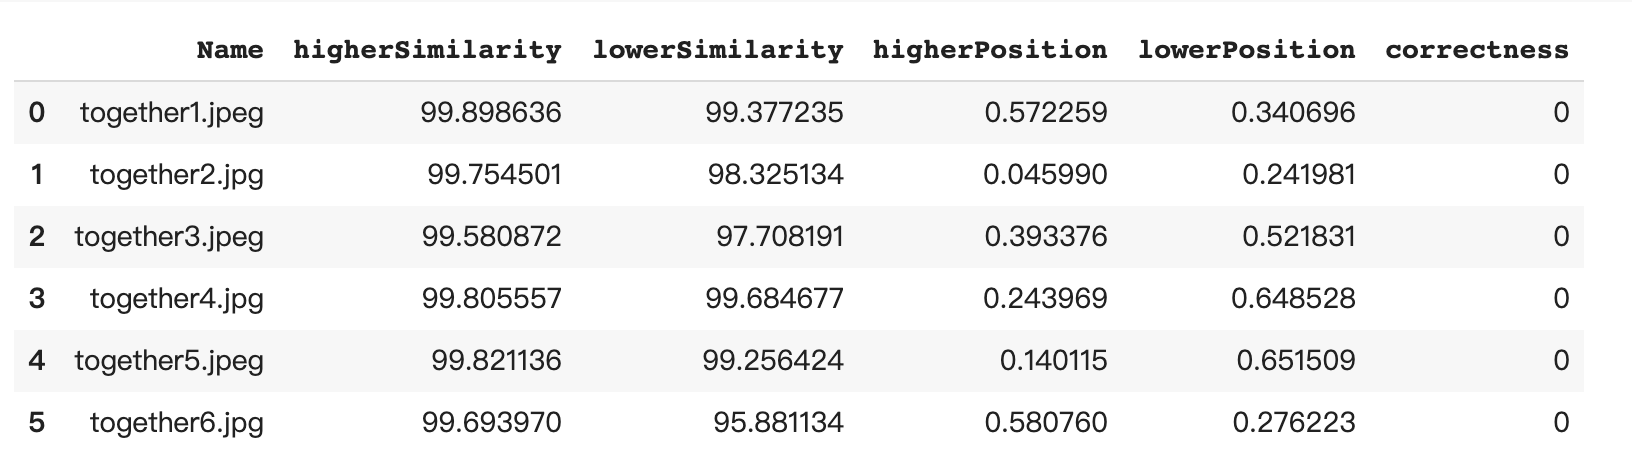

We can see that though AWS rocognize both Amber and Beryl as Beryl, but it successfully assign higher similarity scores for beryl. We will next see the distribution of their similarity scores.

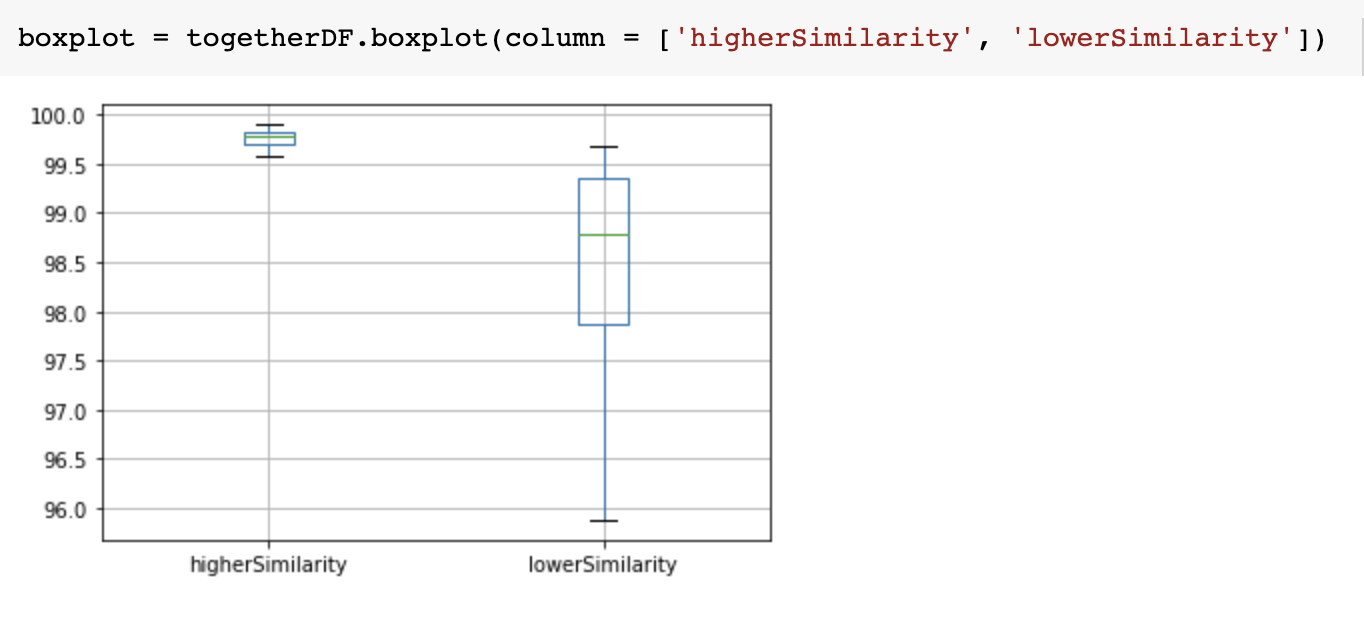

From the boxplot, we can see that AWS identifies beryl with similarity scores higher than 99.5 overall and the range is tiny, while the similarity scores between beryl and amber is overall lower and the range is wider. In other words, AWS actually performs very well on identifying twins as it gives overall higher similarity scores for the correct person.

We can also tune the parameter of the function compare_faces by setting the SimilarityThreshold very high (i.e. 99.5), then we may be able to identify only one person in the photo as beryl.

However, we will miss 'true beryl' in some other cases because as we can see from the boxplots, the range of the similarity scores overlaps at some points. Thus we cannot find a 'best' similarity threshold that can distinguish amber from beryl without missing true beryl. Except from the ability to distinguish between twins, in the time of a pendamic, we would also like to discover whether masks will impact the recognition. And we would extend the data to people and their photos with glasses, masks and funny faces.




### Expressions and Accessories

Secondly we want to identify if different facial expressions or accessories have a significant impact on the identification of individuals. We thus use five variables in this case, with one being the original picture – “Name” - and one being the control group – “null”. We hope to use the similarity between “name” and “null” as a benchmark to find out whether the differences (if any) found in the mean of the other groups are significant. 
Here the three groups we use to compare with are: 1) glass-wearing; 2) mask-covering; 3) making funny faces. Their similarity to the original picture is returned as the input in the following table:

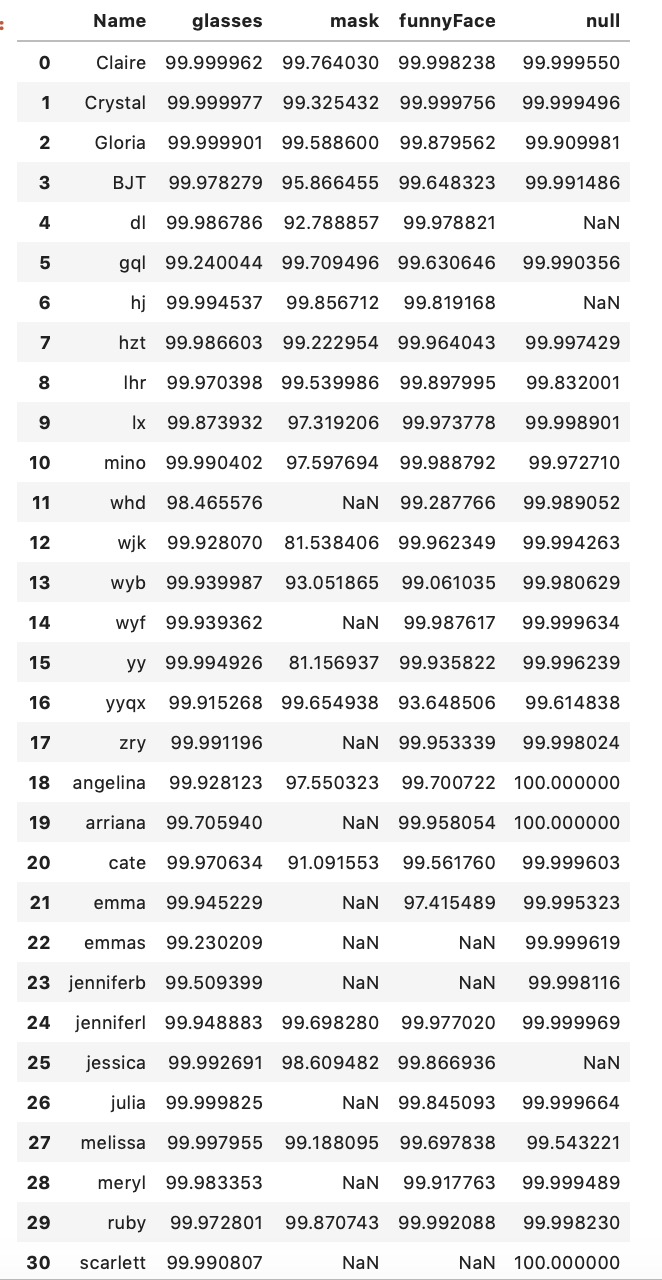

From the dataframe, we can see that the column of 'mask' contains many nan values, which means AWS Rekognition fails to identify the person from the photo of the person wearing mask.
Then, we use a boxplot to better visualize:

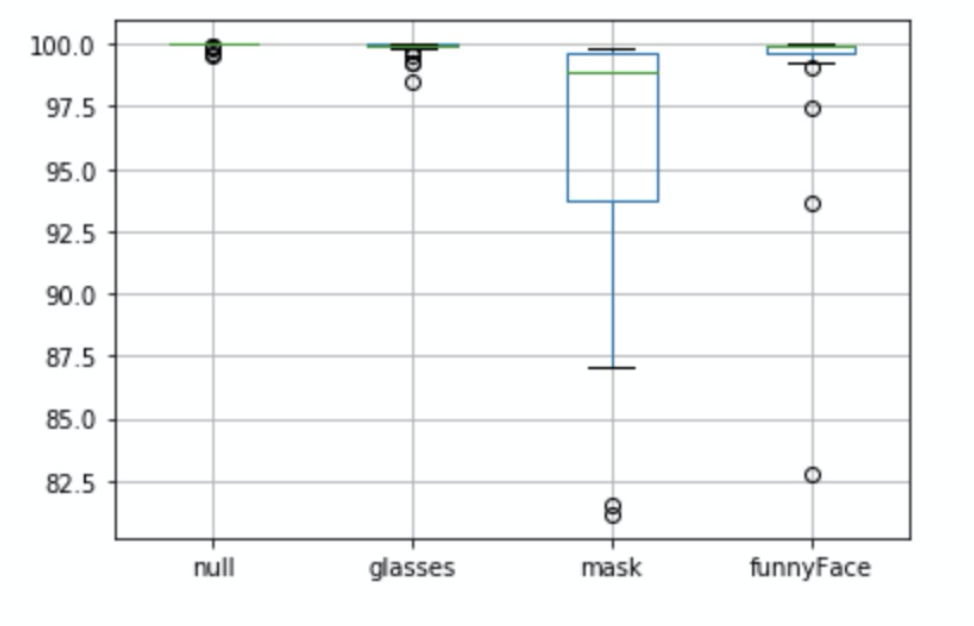

The boxplot confirms our initial thought that each group has a different mean, especially the mask group. So we conduct a hypothesis testing:

    Null Hypothesis: There is no significant difference between the means of the variables. 
    Alternative Hypothesis: There is a significant difference between the means of the variables.
    Testing Method: One-way ANOVA Testing

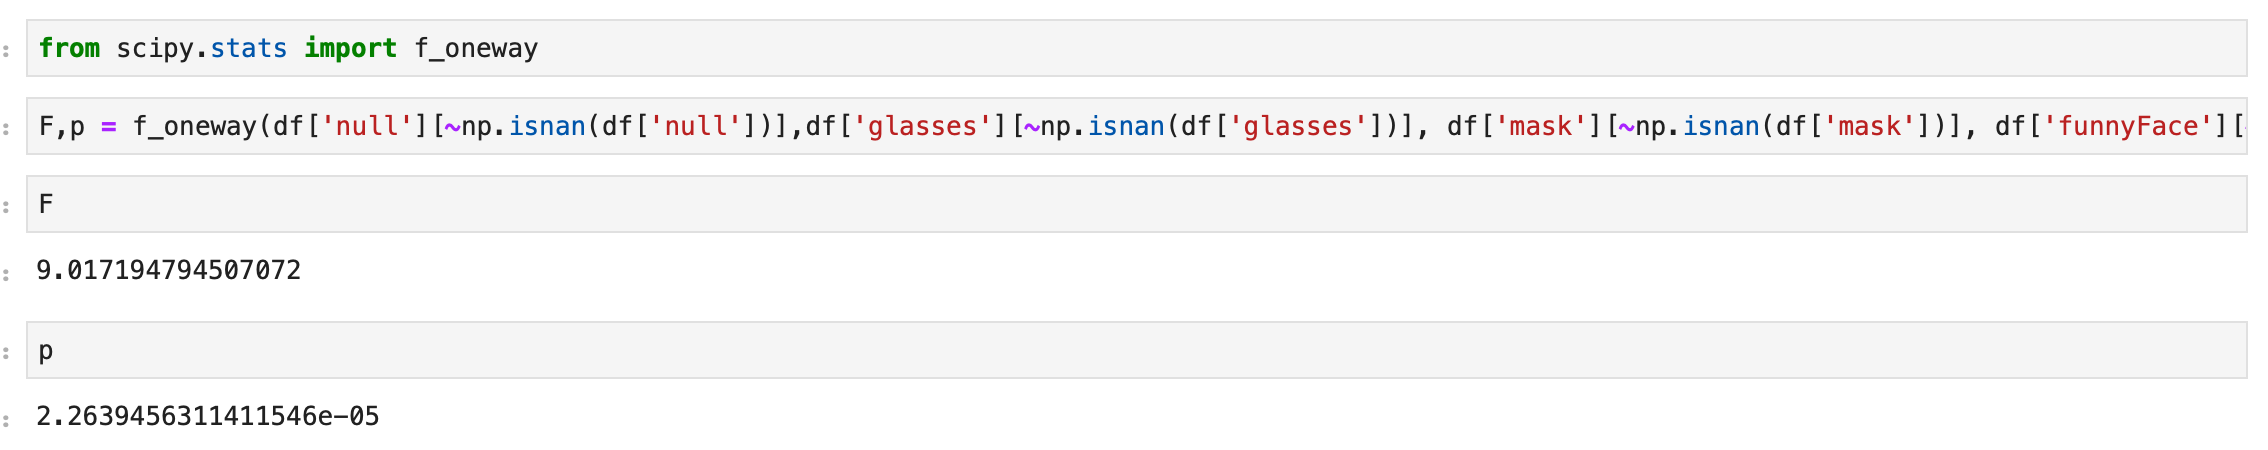

Result: The One-way ANOVA Testing shows an output F value of 9.017 and p-value=0.0000226. Using a 5% significance level, it shows that there is a 0.00226% risk of concluding that a difference exists when there is no actual difference. Thus, we reject the null hypothesis and conclude that not all population means are equal. 

But the ANOVA test only shows that it is likely that the four groups have a difference in mean, but it has not signified which groups is most likely to differ or which group differs by most. Therefore, we optimize our testing method by using T tests. 

    Null Hypothesis: There is no significant difference between the mean in the “glasses” group and the “null group. 
    Alternative Hypothesis: There is a significant difference between the mean in the “glasses” group and the “null” group.
    Testing Method: T-test

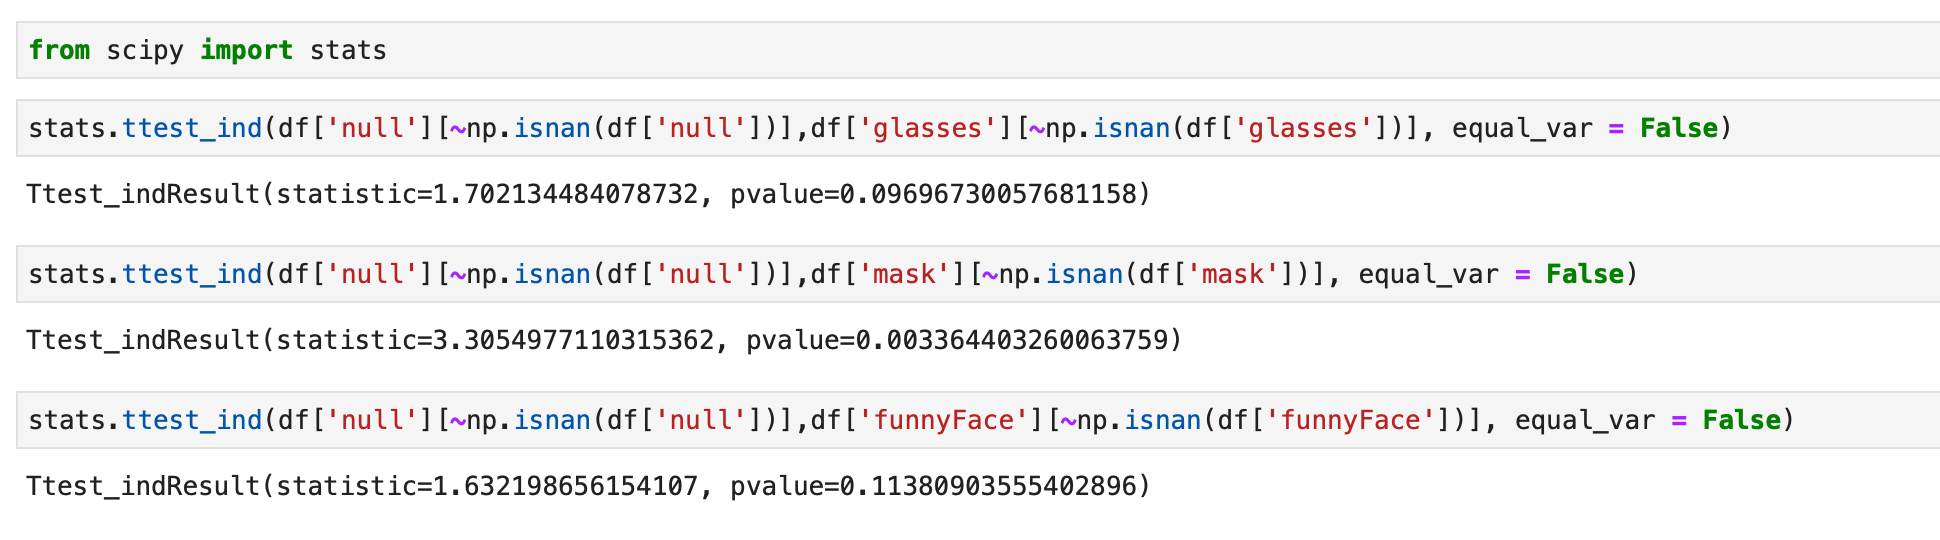

By comparing the image of people wearing glasses, masks, and making funny faces with their daily pictures respectively, we could find that the p values are 0.097, 0.0034 and 0.114. Comparing with p=0.05, we can only reject the second group of which p=0.0034. We reject the null hypothesis that there is no difference between the mean of the group when people wear masks and when they are not. 

Combing our clusion with our observation from the dataframe, we finds that with the person wearing a mask in the photo, AWS Rekognition has higher probability to fail to regonize the person (by 'nan' fromt the dataframe), and for the part that AWS Rekognition match the faces with masks successfully, the mean similarity score is different from that of regular photos ('null') by T-test. This indicates that AWS Rekognition is less confident to identify people when they wear masks. 


## **Conclusions**



Because the mean similarity is significantly different between regular photos and photos with the person wearing mask, we conclude that Amazon Rekognition fail to identify faces when the individuals are wearing masks. 

We conclude that Amazon Rekognition still recognizes the individuals when they are wearing glasses and making funny faces. We also conclude that Amazon Rekognition is able to tell the twin sisters apart. 

Amazon Rekognition is relatively accurate in facial recognitions. The developers can look for ways that improve facial recognition when the individuals are wearing masks.

Implications:
The result imposes a practical question during the pandemic. Indeed, wearing a mask save lives, yet are they imposing more inconveniency in our lives? Is the current technology staying up with the new “norm”? How shall we stay up with the new era and maximum the utility of tools?
Maybe we just need a transparent mask. 


### Implications:
The result imposes a practical question during the pandemic. Indeed, wearing a mask save lives, yet are they imposing more inconveniency in our lives? Is the current technology staying up with the new “norm”? How shall we stay up with the new era and maximum the utility of tools?

Maybe we just need a transparent mask. 

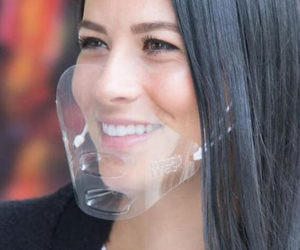